In [3]:
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Polygon

In [4]:
capitals = geopandas.read_file(geopandas.datasets.get_path("naturalearth_cities"))
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# Create a subset of the world data that is just the South American continent
south_america = world[world["continent"] == "South America"]

# Create a custom polygon
polygon = Polygon([(0, 0), (0, 90), (180, 90), (180, 0), (0, 0)])
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=world.crs)

In [5]:
poly_gdf

,0,geometry
0,1,"POLYGON ((0.00000 0.00000, 0.00000 90.00000, 1..."


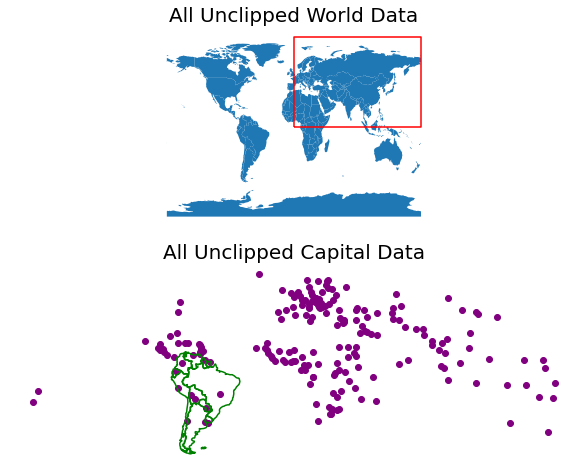

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
world.plot(ax=ax1)
poly_gdf.boundary.plot(ax=ax1, color="red")
south_america.boundary.plot(ax=ax2, color="green")
capitals.plot(ax=ax2, color="purple")
ax1.set_title("All Unclipped World Data", fontsize=20)
ax2.set_title("All Unclipped Capital Data", fontsize=20)
ax1.set_axis_off()
ax2.set_axis_off()
plt.show()

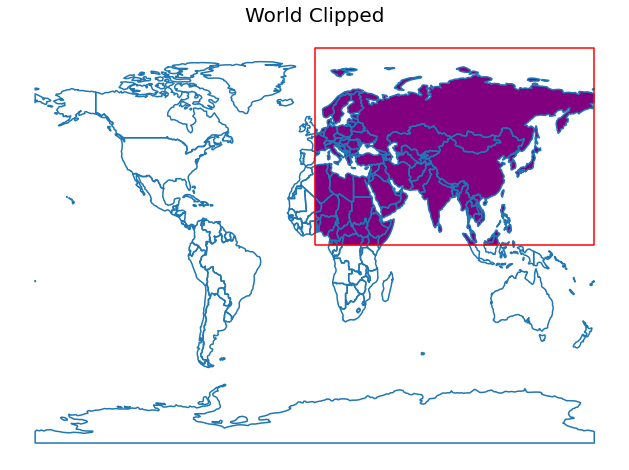

In [7]:
world_clipped = geopandas.clip(world, polygon)

# Plot the clipped data
# The plot below shows the results of the clip function applied to the world
# sphinx_gallery_thumbnail_number = 2
fig, ax = plt.subplots(figsize=(12, 8))
world_clipped.plot(ax=ax, color="purple")
world.boundary.plot(ax=ax)
poly_gdf.boundary.plot(ax=ax, color="red")
ax.set_title("World Clipped", fontsize=20)
ax.set_axis_off()
plt.show()

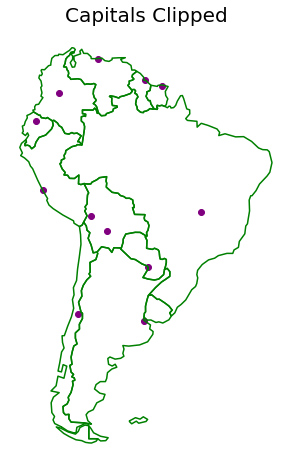

In [8]:
capitals_clipped = geopandas.clip(capitals, south_america)

# Plot the clipped data
# The plot below shows the results of the clip function applied to the capital cities
fig, ax = plt.subplots(figsize=(12, 8))
capitals_clipped.plot(ax=ax, color="purple")
south_america.boundary.plot(ax=ax, color="green")
ax.set_title("Capitals Clipped", fontsize=20)
ax.set_axis_off()
plt.show()